# CUNY MSDS DATA618 - Quantative Finance

## Week 2 

### Description

1. Read the attached article by Villalta and Whitwell

2. Download the U.S. GDP Growth Rate 1961 - 2022 dataset from (https://www.macrotrends.net/countries/USA/united-states/gdp-growth-rate)

3. Download the Federal Funds Effective Rate dataset from (https://fred.stlouisfed.org/series/FEDFUNDS)

4. Determine the degree of correlation (or negative correlation) between these two data sets (hints on Correlation of Two Variables in a Time Series in Python - https://stackoverflow.com/questions/4809577/correlation-of-two-variables-in-a-time-series-in-python) [N.b.: Use of Python for this analysis is recommended but not required]

5. Download the Bureau of Labor Statistics Consumer Price Index Dataset from https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/ and determine the correlation (or negative correlation) between the annual inflation rate and the Feds Fund Rate.

6. Post your conclusions from this analysis regarding Villalt and Whitwell assertions regarding Economically Sensitive Exposures, Interest Rate Sensitive Exposures and the actions of the FED. on the Discussion Board and respond to the postings of others.

In [99]:
# Import required libraries & packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
pd.set_option('mode.chained_assignment', None)

Data Sourcing:
Load U.S. GDP Growth Rate 1961 - 2022 from CSV file to a DataFrame. Data is in CSV (Comma separated value) format and to access it over the net. This file is saved on network. Top 16 rows are ignored, given these rows are not actually data rows. Index is set to date field to sort rest of the columns based on the date.
This data set has 3 columns - 1. Date 2. GDP Growth (%), 3.	Annual Change in GDP Growth (%)

In [100]:
gdp_growth = pd.read_csv("https://raw.githubusercontent.com/rnivas2028/MSDS/main/Data618/Week2/united-states-gdp-growth-rate.csv",
                     skiprows = 16,parse_dates = ['date']).set_index('date', inplace = False)

In [101]:
gdp_growth.head()

,GDP Growth (%),Annual Change,
date,,,
1961-12-31,2.3,NaN,NaN
1962-12-31,6.1,3.8,NaN
1963-12-31,4.4,-1.7,NaN
1964-12-31,5.8,1.4,NaN
1965-12-31,6.4,0.6,NaN


Let’s create a Time Series plot of GDP Growth (%) and Annual Change. We can see trend of increasing and decreasing of GDP Growth, perhaps there is overall trend of decreasing GDP Growth. Year 1985 shows highest GDP Growth whereas year 1982 shows negative trend. Also, year 2019 shows negative trend which may be due to Covid-19. Annual change in GDP growth is linked with GDP Growth for most of the year.

<AxesSubplot:xlabel='date'>

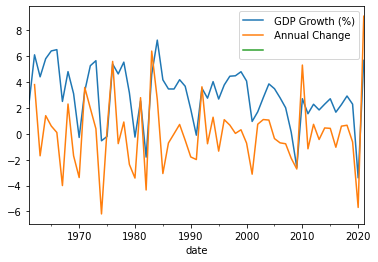

In [102]:
gdp_growth.plot()

Let’s load Federal Funds Effective Rate data from the network. This data set is also on the network. This data file has data starting from 1951. Our interest is to analyze data from 1961 to 2021 so let’s filter the data from 1951 to 1960. Also, DATE filed is set as index field to short data in a timeseries. 

This dataset is time series data. Also let’s create yearly average based on the monthly data provided in the dataset

In [103]:
fed_funds = pd.read_csv('https://raw.githubusercontent.com/rnivas2028/MSDS/main/Data618/Week2/FEDFUNDS.csv')
fed_funds['DATE']= pd.to_datetime(fed_funds['DATE'])
fed_funds = (fed_funds[(fed_funds['DATE'] > '1960-12-31') & (fed_funds['DATE'] < '2022-01-01')]).set_index('DATE', inplace = False).resample('1Y', closed = 'right').mean()
fed_funds.head()

,FEDFUNDS
DATE,
1961-12-31,1.955000
1962-12-31,2.708333
1963-12-31,3.178333
1964-12-31,3.496667
1965-12-31,4.075000


Let’s plot the data to understand the pattern. By plotting the data, we found Federal Funds Effective Rate were high around 1980. 
There was an increment trend prior to 1980 and declining trend afterwards. Current trend shows decreasing Federal Funds Effective Rate. Around 1980 rate was around 16%

<AxesSubplot:xlabel='DATE'>

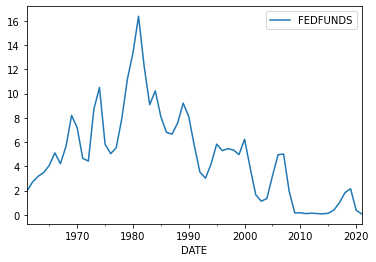

In [104]:
fed_funds.plot()

It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neutral or zero, meaning that the variables are unrelated.

__Positive Correlation__: both variables change in the same direction. The y values tend to increase as the x values increase. This illustrates strong positive correlation, which occurs when large values of one feature correspond to large values of the other, and vice versa.

__Neutral Correlation__: No relationship in the change of the variables. This is a form of weak correlation, which occurs when an association between two features is not obvious or is hardly observable.

__Negative Correlation__: variables change in opposite directions. The y values tend to decrease as the x values increase. This shows strong negative correlation, which occurs when large values of one feature correspond to small values of the other, and vice versa.

Let’s create a new dataframe to calculate ad analyze Degree of correlation. This analysis is to show correlation between GDP Growth(%) and Fed Funds Rate

In [105]:
selected = pd.DataFrame(zip(gdp_growth[' GDP Growth (%)'],fed_funds['FEDFUNDS']),columns=['GDP Growth(%)','Fed Funds Rate'])

<AxesSubplot:>

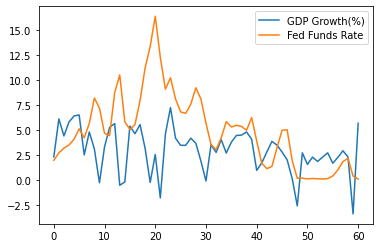

In [106]:
selected.plot()

This plot shows almost a neutral trend of GDP Growth(%) and Fed Funds Rate. We can see Fed Funds Rate goes up and GDP Growth goes down and vice-versa.
We can see both GDP Growth(%) and Fed Funds Rate increased or decreased together also. However, we will analyze it by calculating the Correlation.

Lets use Correlation function from pandas package to find Correlation in this dataset.

In [107]:
selected.corr()

,GDP Growth(%),Fed Funds Rate
GDP Growth(%),1.000000,0.069789
Fed Funds Rate,0.069789,1.000000


Positive factional value(0.069789) shows no correlation or a positive but marginal correlation. So most of the time when Fed Funds Rate goes up and GDP Growth goes down and vice-versa.
We can see both GDP Growth(%) and Fed Funds Rate increased or decreased together but only in few times.

### Degree of correlation (Annual Change in GDP Growth(%) and Fed Funds Rate)

Lets create a new dataframe to calculate ad analyze Degree of correlation. This analysis is to show correlation between Annual Change in GDP Growth and Fed Funds Rate.
Lets create a new dataframe to analyze this time series data

In [108]:
selected = pd.DataFrame(zip(gdp_growth[' Annual Change'],fed_funds['FEDFUNDS']),columns=['Annual Change in GDP Growth','Feds Fund Rate'])

This plot shows a negative trend of increasing Annual Change in GDP Growth(%) and Fed Funds Rate. We can see Fed Funds Rate goes up and GDP Growth goes down and vice-versa.
We have not seen both GDP Growth(%) and Fed Funds Rate increased or decreased together. A sharp trend can be seen Fed Funds Rate is over 16% but GDP Growth is negative.
At rate of interest around 0, GDP Growth(%) shows sign of positive trend.

However we will analyze it by calculating the Correlation between GDP Growth(%) and Fed Funds Rate.

<AxesSubplot:>

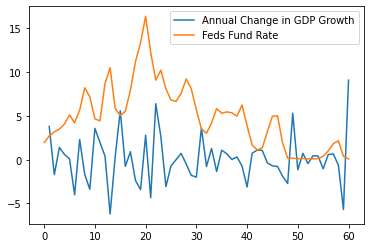

In [109]:
selected.plot()

In [110]:
selected.corr()

,Annual Change in GDP Growth,Feds Fund Rate
Annual Change in GDP Growth,1.00000,-0.17633
Feds Fund Rate,-0.17633,1.00000


We have calculated Correlation and found negative Correlation (Feds Fund Rate -0.17633). A negative correlation is a relationship between two variables in which the increase in one variable leads to a decrease in the other which we see here in GDP Growth(%) and Fed Funds Rate trends. 

We have not seen both GDP Growth(%) and Fed Funds Rate increased or decreased together. We can see Fed Funds Rate goes up and GDP Growth goes down and vice-versa.

### Degree of correlation (Inflation and Fed Funds Rate)
Lets download the Bureau of Labor Statistics Consumer Price Index Dataset from the site
https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/

Lets load the dataset. This dataset is a time series data.

In [111]:
cpi = pd.read_csv("https://raw.githubusercontent.com/rnivas2028/MSDS/main/Data618/Week2/cpi.csv",
                     skiprows = 1)

In [112]:
cpi.head

<bound method NDFrame.head of      Year      Jan      Feb      Mar      Apr      May     June     July  \
0    1913    9.800    9.800    9.800    9.800    9.700    9.800    9.900   
1    1914   10.000    9.900    9.900    9.800    9.900    9.900   10.000   
2    1915   10.100   10.000    9.900   10.000   10.100   10.100   10.100   
3    1916   10.400   10.400   10.500   10.600   10.700   10.800   10.800   
4    1917   11.700   12.000   12.000   12.600   12.800   13.000   12.800   
..    ...      ...      ...      ...      ...      ...      ...      ...   
104  2017  242.839  243.603  243.801  244.524  244.733  244.955  244.786   
105  2018  247.867  248.991  249.554  250.546  251.588  251.989  252.006   
106  2019  251.712  252.776  254.202  255.548  256.092  256.143  256.571   
107  2020  257.971  258.678  258.115  256.389  256.394  257.797  259.101   
108  2021  261.582  263.014  264.877  267.054  269.195  271.696  273.003   

         Aug      Sep      Oct      Nov      Dec      Avg

In [113]:
 Also filter the data prior to 1961 because Fed Funds Rate is only available after year 1960

SyntaxError: invalid syntax (Temp/ipykernel_101820/3664886160.py, line 1)

In [ ]:
cpi_avg=(cpi.iloc[:, [0, 13]])
cpi_avg.Year=pd.to_datetime(cpi_avg.Year, format='%Y')
cpi_avg = (cpi_avg[(cpi_avg['Year'] > '1960-12-31') & (cpi_avg['Year'] < '2022-01-01')]).set_index('Year', inplace = False)
cpi_avg.head()

Lets analyze the trend first. Inflation shows trend of going up as we can see in the plot.

In [ ]:
cpi_avg.plot()

We have create a new dataframe with two columns from two different datasets - Avg column from Labor Statistics Consumer Price Index Dataset and Feds Fund Rate from federal dataset 

In [ ]:
selected=pd.DataFrame(zip(cpi_avg['Avg'],fed_funds['FEDFUNDS']),columns=['Annual Inflation Rate','Feds Fund Rate'])
selected.head()

In [ ]:
selected.plot()

In [ ]:
selected.corr()

As we can see this is case of negative Correlation which we saw in the trend also. Annual inflation shows increasing trend whereas Fed fund rate shows almost in positive trend, however there is a declined trend.

### Conclusion

Correlation is the measure of how two or more variables are related to one another, also referred to as linear dependence. An increase in demand for a product increases its price, also called the demand curve, traffic on roads at certain intervals of time of the day, the amount of rain correlates with grass fires.

The correlation coeffient shows how strong the linear relationship between two variables is. If the correlation is positive, that means both the variables are moving in same direction. Negative correlation implies, when one variable increases the other variable decreases. If the correlation is +/- 0.8 and above, high degree of correlation or the association between the dependent variables are strong. correlation between +/- 0.5 to+/_0.8, sufficient degree of correlation and less than +/-0.5, weak correlation

As we show in Degree of correlation (GDP Growth(%) and Fed Funds Rate) calculation:

a) Positive fractional value(0.069789) shows no correlation or a positive but marginal correlation. We can see both GDP Growth(%) and Fed Funds Rate increased or decreased together but only in few times So most of the time when Fed Funds Rate goes up and GDP Growth goes down and vice-versa.

b) A negative correlation is a relationship between two variables in which the increase in one variable leads to a decrease in the other which we see here in GDP Growth(%) and Fed Funds Rate trends. Degree of correlation (Annual Change in GDP Growth(%) and Fed Funds Rate). We have calculated Correlation and found negative Correlation (Feds Fund Rate -0.17633).

c) A negative Correlation which we saw in the trend also. Annual inflation shows an increasing trend whereas Fed fund rate shows an almost in a positive trend, however, there is a declining trend.


##### References

https://www.macrotrends.net/countries/USA/united-states/gdp-growth-rate

https://fred.stlouisfed.org/series/FEDFUNDS 

https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/ 

https://www.researchgate.net/



